In [2]:
!pip install tensorflow==2.8.0
!pip install gym
!pip install keras==2.8.0
!pip install keras-rl2==1.0.5
!pip install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 63.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 39.0 MB/s eta 0:00:00
  Using cached keras-2.8.0-py2.py3-none-any.whl (1.4 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 89.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 56.3 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.1
    Uninstalling tensorboard-data-server-0.7.1:
      Successfully uninstalled tensorboard-data-server-0.7.1
  Attempting uninstall: google-auth-oauthlib
    Found existing installation: google-auth-o

In [ ]:
import gym
from gym import Env
from gym.spaces import Discrete, Box
import random
import numpy as np
import pandas as pd

In [ ]:
liste_length = []
liste_cpu = []
liste_vnf = []
with open('/content/time_series (3).txt','r') as fichier:
 lignes = fichier.readlines()
 donnees = [int(ligne.strip()) for ligne in lignes[:62116]]
 abscisses = list(range(1, 62117))

class NetworkEnv():

  def __init__(self):
    #initialisation
    self.action_space = Discrete (3)   #espace d'actions
    self.observation_space = Box(low = np.array([0,0,1,-1]) , high= np.array([2000,1,20,1]))   #espace d'observation
    self.traffic = 0   #initialisation de trafic
    self.cpu = 0.1 +random.uniform(-0.1, 0.1)   #initialisation de cpu
    self.vnf = 1   #initialisation de vnf
    self.pended_vnf = 0   #initialisation de vnf en attente d'exécution
    self.state = self.traffic, self.cpu, self.vnf, self.pended_vnf   #état
    self.length = 62000    #initialisation de la longueur du programme
    i = 0   #initalisation d'indice

  def step(self,action):
    global liste_length, liste_cpu, liste_vnf
    liste_length.append(62000 - self.length)
    liste_vnf.append(self.vnf)
    liste_cpu.append(self.cpu)
    self.vnf = self.vnf + self.pended_vnf

    if self.vnf==1 and action==0:
      self.pended_vnf = 0
    elif self.vnf==20 and action==2:
      self.pended_vnf = 0
    else:
      self.pended_vnf = action - 1

    i = 62000 - self.length
    groupe = donnees[i:i+ 5]
    if groupe :
      try:
        self.traffic = sum(groupe)/len(groupe)
      except ValueError:
        pass
      self.cpu = (self.traffic / self.vnf) / 100
      i += 5

    # récompense
    if self.cpu>= 0.2 and self.cpu<=0.8 :
      reward = 5
    else:
      reward = -5

    if self.length <= 0:
      done = True
    else:
      done =False
    self.length -= 5

     # nouvel état
    self.state = self.traffic, self.cpu, self.vnf, self.pended_vnf
    info = {}

    return self.state, reward, done, info

  def render(self):
    pass

  def reset(self):
    #rénitialisation de paramètres
    global liste_length, liste_cpu, liste_vnf
    self.traffic = 0
    self.cpu = 0.1+random.uniform(-0.1, 0.1)
    self.vnf = 1
    self.length = 62000
    self.pended_vnf = 0
    liste_length = []
    liste_cpu = []
    liste_vnf = []
    self.state = self.traffic, self.cpu, self.vnf, self.pended_vnf
    return self.state

In [ ]:
env = NetworkEnv()

/usr/local/lib/python3.10/dist-packages/gym/spaces/box.py:128: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


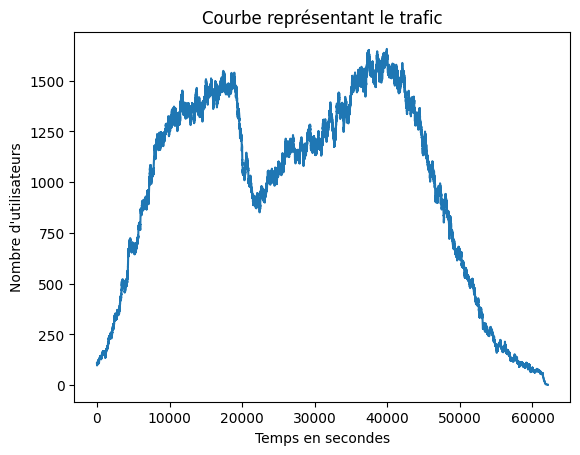

In [ ]:
import matplotlib.pyplot as plt

# Tracer la courbe
plt.plot(abscisses, donnees)

# Ajouter des étiquettes et un titre
plt.xlabel('Temps en secondes')
plt.ylabel("Nombre d'utilisateurs")
plt.title('Courbe représentant le trafic')

# Afficher la courbe
plt.show()

In [ ]:
episodes = 10 # 10 episode to run
for episode in range(1, episodes+1):
    state = env.reset()
    done = False
    score = 0

    while not done:
        # env.render() we have nothing to render
        action = env.action_space.sample() #random choose 1
        n_state, reward, done, info = env.step(action)
        score+=reward
    print('Episode:{} score:{}'.format(episode, score))

Episode:1 score:-25475
Episode:2 score:-23295
Episode:3 score:-24555
Episode:4 score:-22445
Episode:5 score:-29845
Episode:6 score:-22915
Episode:7 score:-22995
Episode:8 score:-31255
Episode:9 score:-31875
Episode:10 score:-18785


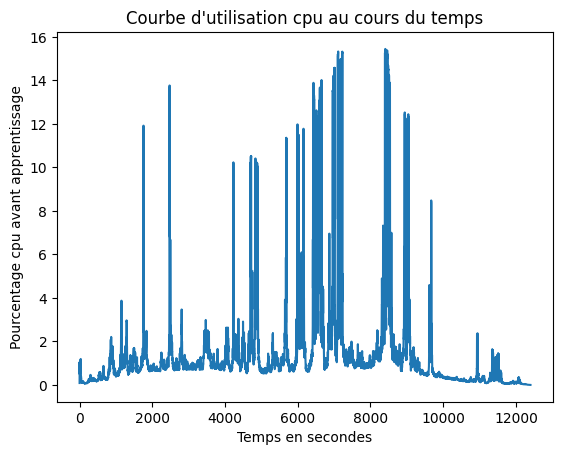

In [ ]:
# Tracer la courbe
liste_abscisses = list(range(1, 12402))

plt.plot(liste_abscisses, liste_cpu)

# Ajouter des étiquettes et un titre
plt.xlabel('Temps en secondes')
plt.ylabel('Pourcentage cpu avant apprentissage')
plt.title("Courbe d'utilisation cpu au cours du temps")

# Afficher la courbe
plt.show()

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

In [ ]:
states =env.observation_space.shape
actions = env.action_space.n


In [ ]:
def build_model(states, actions):
    b_model = Sequential()
    b_model.add(Dense(24, activation='relu', input_shape=(1,4)))
    b_model.add(Dense(24, activation='relu'))
    b_model.add(Dense(actions, activation='linear'))
    b_model.add(Flatten())
    return b_model

In [ ]:
model = build_model(states, actions)

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 1, 24)             120       
                                                                 
 dense_10 (Dense)            (None, 1, 24)             600       
                                                                 
 dense_11 (Dense)            (None, 1, 3)              75        
                                                                 
 flatten_3 (Flatten)         (None, 3)                 0         
                                                                 
Total params: 795
Trainable params: 795
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from rl.agents import DQNAgent
from rl.policy import BoltzmannQPolicy
from rl.memory import SequentialMemory

In [ ]:
def build_agent(model, actions):
    policy = BoltzmannQPolicy()
    memory = SequentialMemory(limit=200000, window_length=1)
    dqn = DQNAgent(model=model, memory=memory, policy=policy,
                  nb_actions=actions, nb_steps_warmup=10, target_model_update=1e-2)
    return dqn

In [ ]:
# Run this if needed
del model
model = build_model(states, actions)

In [ ]:
dqn = build_agent(model, actions)
dqn.compile(Adam(lr=1e-3), metrics=['mae'])
dqn.fit(env, nb_steps=200000, visualize=False, verbose=1)

Training for 200000 steps ...
Interval 1 (0 steps performed)
10000/10000 [==============================] - 98s 10ms/step - reward: 4.2230
Interval 2 (10000 steps performed)
10000/10000 [==============================] - 96s 10ms/step - reward: 3.4490
1 episodes - episode_reward: 43175.000 [43175.000, 43175.000] - loss: 6.831 - mae: 85.061 - mean_q: 325.853

Interval 3 (20000 steps performed)
10000/10000 [==============================] - 100s 10ms/step - reward: 1.2720
1 episodes - episode_reward: 50405.000 [50405.000, 50405.000] - loss: 26.181 - mae: 303.939 - mean_q: 554.459

Interval 4 (30000 steps performed)
10000/10000 [==============================] - 103s 10ms/step - reward: 0.1080
1 episodes - episode_reward: -6985.000 [-6985.000, -6985.000] - loss: 15.525 - mae: 418.847 - mean_q: 634.160

Interval 5 (40000 steps performed)
10000/10000 [==============================] - 103s 10ms/step - reward: 1.0620
1 episodes - episode_reward: 12835.000 [12835.000, 12835.000] - loss: 18.63

In [ ]:
scores = dqn.test(env, nb_episodes=2, visualize=False)
print(np.mean(scores.history['episode_reward']))

Testing for 2 episodes ...
Episode 1: reward: 57495.000, steps: 12401
Episode 2: reward: 57495.000, steps: 12401
57495.0


In [ ]:
# test it from our trained model
_ = dqn.test(env, nb_episodes=2, visualize=False)

Testing for 2 episodes ...
Episode 1: reward: 57495.000, steps: 12401
Episode 2: reward: 57495.000, steps: 12401


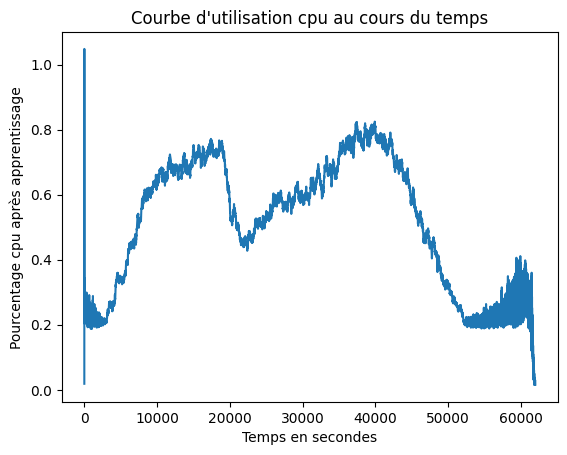

In [ ]:
# Création du graphe
plt.plot(liste_length, liste_cpu)

# Ajouter des étiquettes et un titre
plt.xlabel('Temps en secondes')
plt.ylabel('Pourcentage cpu après apprentissage')
plt.title("Courbe d'utilisation cpu au cours du temps")

# Afficher le graphe
plt.show()

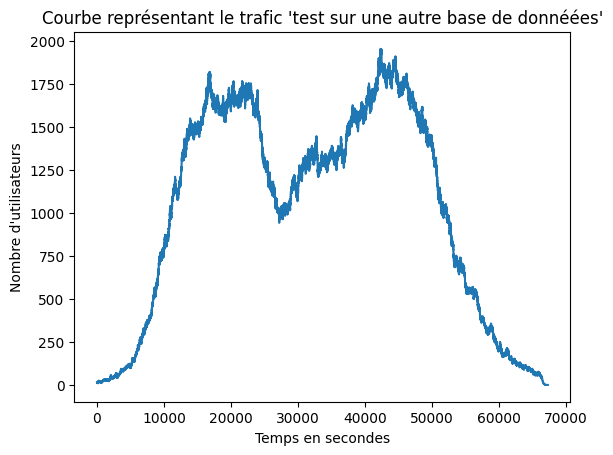

In [ ]:
with open('/content/time_series_18_03 (1).txt','r') as fichier:
 lignes = fichier.readlines()
 donnees = [int(ligne.strip()) for ligne in lignes[:67312]]
 abscisses = list(range(1, 67313))
# Tracer la courbe
plt.plot(abscisses, donnees)

# Ajouter des étiquettes et un titre
plt.xlabel('Temps en secondes')
plt.ylabel("Nombre d'utilisateurs")
plt.title("Courbe représentant le trafic 'test sur une autre base de donnéées'")

# Afficher la courbe
plt.show()

In [ ]:
scores = dqn.test(env, nb_episodes=2, visualize=False)
print(np.mean(scores.history['episode_reward']))

Testing for 2 episodes ...
Episode 1: reward: 27825.000, steps: 12401
Episode 2: reward: 27825.000, steps: 12401
27825.0


In [ ]:
_ = dqn.test(env, nb_episodes=2, visualize=False)

Testing for 2 episodes ...
Episode 1: reward: 27825.000, steps: 12401
Episode 2: reward: 27825.000, steps: 12401


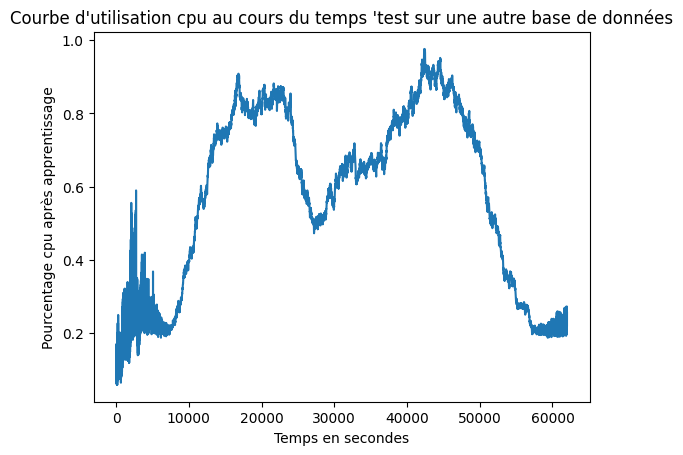

In [ ]:
# Création du graphe

plt.plot(liste_length, liste_cpu)

# Ajouter des étiquettes et un titre
plt.xlabel('Temps en secondes')
plt.ylabel('Pourcentage cpu après apprentissage')
plt.title("Courbe d'utilisation cpu au cours du temps 'test sur une autre base de données")

# Afficher le graphe
plt.show()